In [1]:
import pandas as pd
import numpy as np
from Higgs.tools.ImplementationUtils import (
    implementChannelLimit,
    readHEPDataCsv,
    implementChannelWidthLimit,
    fromHB5Table1,
)
from Higgs import bounds as HB
from Higgs.tools.LimitValidation import validateChannelLimit, validateChannelWidthLimit
import os, sys

sys.path.insert(0, os.path.dirname(os.path.dirname(os.getcwd())))
import MassResolutions as resolution


# ATLAS 13TeV LHC

## `ggH > mumu` [1901.08144](https://arxiv.org/abs/1901.08144)


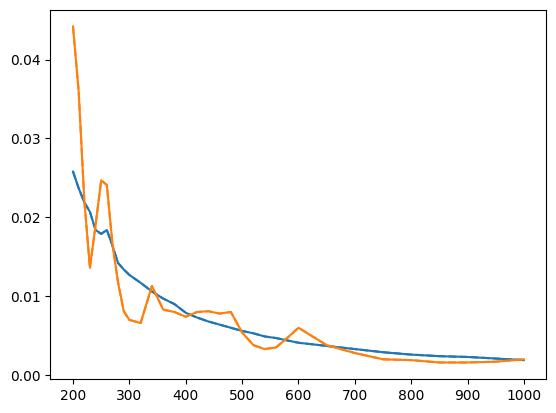

Looks good. Saving this to ggH_LHC13_ATLAS_36.json


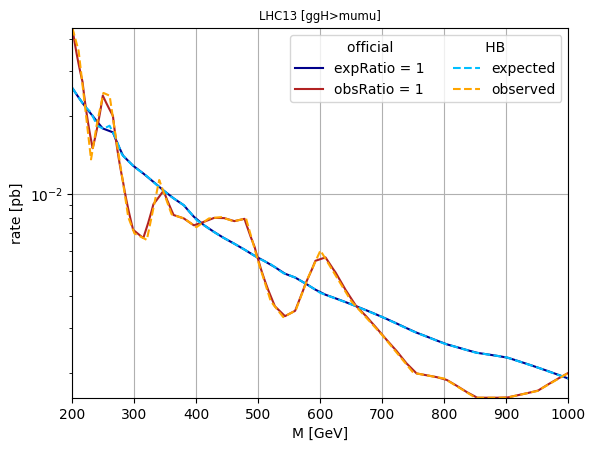

In [2]:
dfs = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins1716572/Table%203/1/csv"
)
df = dfs[1].rename(columns={"PHI MASS [GEV]": "m", "Obs [fb]": "obs"})
df["exp"] = dfs[0]["Exp [fb]"]
df.exp *= 1e-3
df.obs *= 1e-3

process = {"channels": [["ggH", "mumu"]]}
limitFile = implementChannelLimit(
    "1901.08144",
    process,
    "https://doi.org/10.17182/hepdata.84708.v1/t3",
    df,
    idSuffix=1,
    massResolution=resolution.mumu["light"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## `bbH > mumu` [1901.08144](https://arxiv.org/abs/1901.08144)


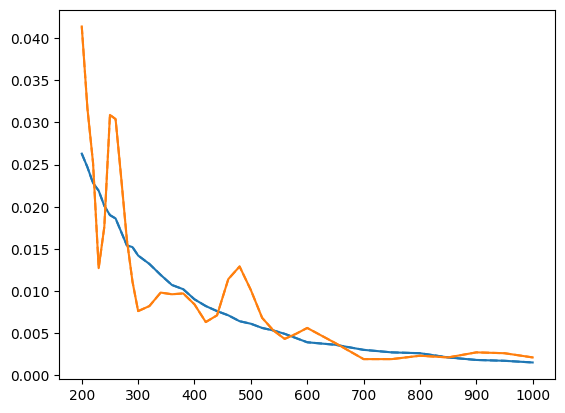

Looks good. Saving this to bbH_LHC13_ATLAS_36.json


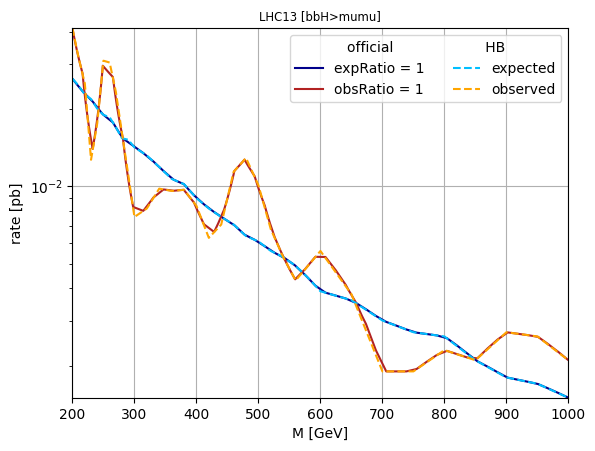

In [3]:
dfs = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins1716572/Table%204/1/csv"
)
df = dfs[1].rename(columns={"PHI MASS [GEV]": "m", "Obs [fb]": "obs"})
df["exp"] = dfs[0]["Exp [fb]"]
df.exp *= 1e-3
df.obs *= 1e-3

process = {"channels": [["bbH", "mumu"]]}
limitFile = implementChannelLimit(
    "1901.08144",
    process,
    "https://doi.org/10.17182/hepdata.84708.v1/t4",
    df,
    idSuffix=2,
    massResolution=resolution.mumu["light"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## `ggH>mumu` finite width [1903.06248](https://arxiv.org/abs/1903.06248)

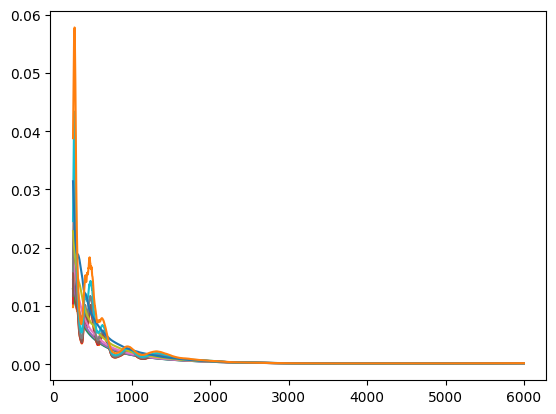

Looks good. Saving this to ggH_LHC13_ATLAS_139.json


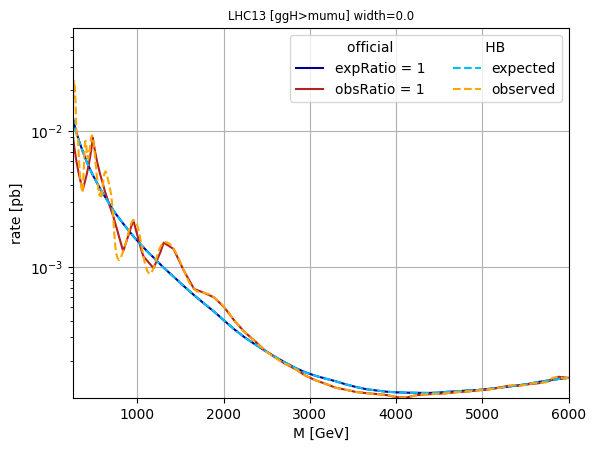

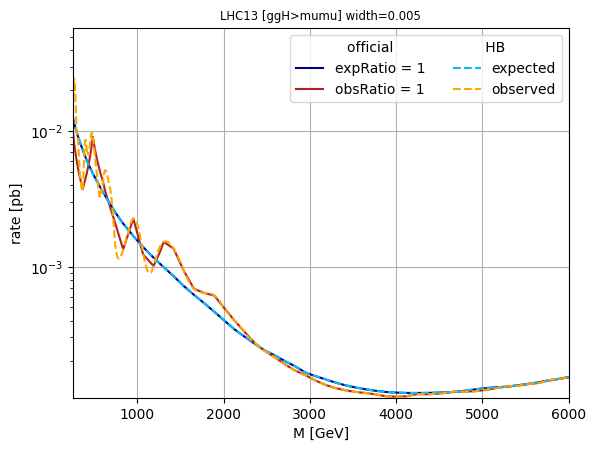

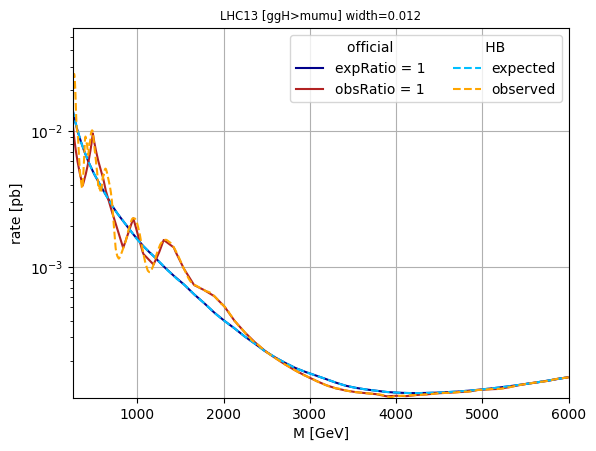

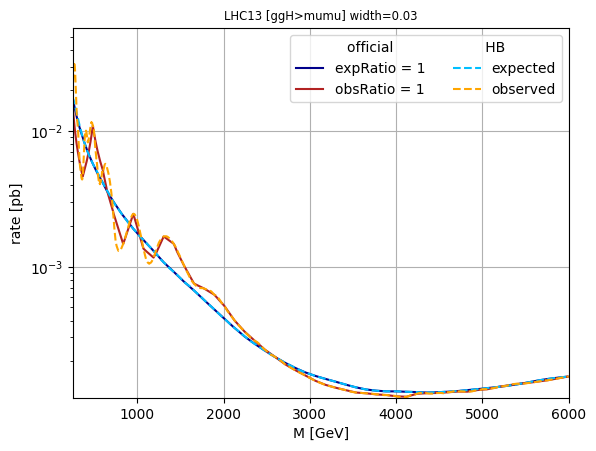

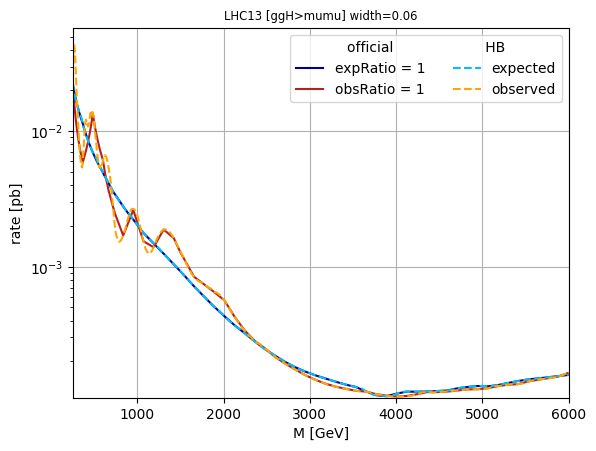

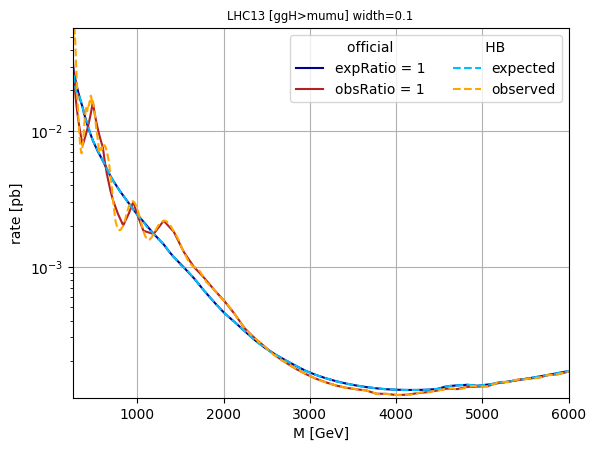

In [4]:
dfsObs = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins1725190/Observed%20dimuon%20cross-section%20limits/3/csv",
)

for w, df in zip([0, 0.5e-2, 1.2e-2, 3e-2, 6e-2, 10e-2], dfsObs):
    df["normWidth"] = w
df = pd.concat(dfsObs).rename(
    columns={"Mass [GeV]": "m", "Cross section upper limit at 95% CL [fb]": "obs"}
)
df["exp"] = pd.concat(
    readHEPDataCsv(
        "https://www.hepdata.net/download/table/ins1725190/Expected%20dimuon%20cross-section%20limits/3/csv",
    )
)["Cross section upper limit at 95% CL [fb]"]

df.obs *= 1e-3
df.exp *= 1e-3

# spin-0 efficiencies only given for a select few masses
# the spin-1 efficiencies that are given through the whole mass range
# are very similar and are used instead
effs = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins1725190/Selection%20efficiency%20for%20spin-0%2C%20spin-1%20and%20spin-2%20resonances/1/csv",
    na_values=["-"],
)

from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

spin1Eff = interp1d(
    *effs[4].to_numpy().T,
    fill_value="extrapolate"  # no significant extrapolation required
)
# since there is only one channel, we put the efficiencies into the limit
df.obs /= spin1Eff(df.m)
df.exp /= spin1Eff(df.m)


limitFile = implementChannelWidthLimit(
    "1903.06248",
    {"channels": [["ggH", "mumu"]]},
    "https://doi.org/10.17182/hepdata.88425.v3",
    df,
    idSuffix=2,
    massResolution=resolution.mumu["highMass"],
)
lim = HB.Limit(limitFile)
validateChannelWidthLimit(lim)


# ATLAS 8TeV LHC

## `H > mumu` 7+8TeV around 125GeV [1406.7663](https://arxiv.org/abs/1406.7663)


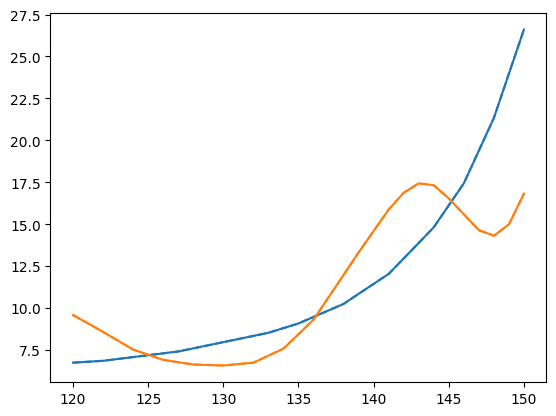

Looks good. Saving this to comb_LHC8_ATLAS_25.json
using effective coupling input for SM-normalized limit


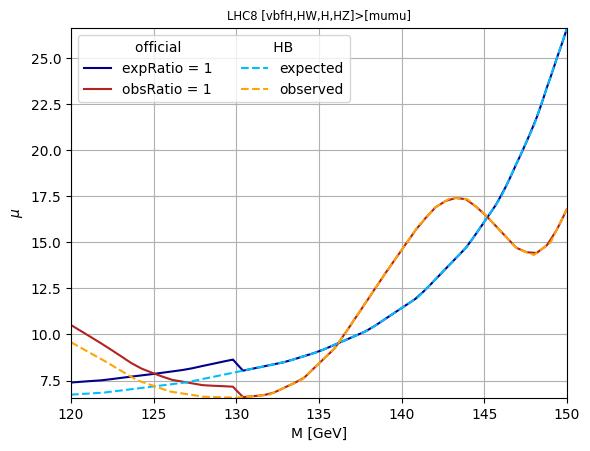

In [5]:
df = fromHB5Table1("7663_Atlas_H-mumu_24.8fb-1", "ATLAS")

limitFile = implementChannelLimit(
    "1406.7663",
    {"channels": [[p, "mumu"] for p in ["H", "vbfH", "HZ", "HW"]]},
    "Fig. 4",
    df,
    massResolution=resolution.mumu["light"],
    normalization={"reference": "SMHiggsInterp", "process": "signal"},
    constraints={"modelLike": "SMHiggsInterp", "process": "signal"},
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)
